## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import functools
from hm import HM
from scipy.stats import multivariate_normal
from matplotlib import cm
from matplotlib.patches import Ellipse
from matplotlib.lines import Line2D

## Auxiliarry function for plotting

In [2]:
def cov_ellipse(mean, cov, ax, N=4, data='truth'):
    """
    Function defined to plot the confidence ellipsoids
    """ 

    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    v_x, v_y = eigvecs[:, 0][0], eigvecs[:, 0][1]
    alpha = np.arctan2(v_y , v_x)
    width, height = 2 * np.sqrt(eigvals)

    if data == 'truth':
        for i in range(N):
            ax.add_patch(Ellipse(mean, i * width, i * height, lw=1, angle=np.degrees(alpha),
                             ec='g', fc='none', linestyle='-'))
    elif data == 'simulated':
        for i in range(N):
            ax.add_patch(Ellipse(mean.T, i * width, i * height, lw=1, angle=np.degrees(alpha),
                             ec='brown', fc='none', linestyle='-'))

    elif data == 'start':
        for i in range(N):
            ax.add_patch(Ellipse(mean.T, i * width, i * height, lw=1, angle=np.degrees(alpha),
                             ec='green', fc='none', linestyle='-'))

## Test HM algorithm on

$$
\pi = \mathcal{N}(\textbf{5, $\Sigma$})
$$
where
$$
\Sigma = \begin{pmatrix} 0.2 & 0 \\ 0 & 0.8
\end{pmatrix}
$$

In [5]:
# Builds it
hm = HM()

dim = 2

random_seed = 30
rs = np.random.RandomState(random_seed)

# Paramteters of target distribution
sigma = np.eye(dim)
mean = [5 for _ in range(dim)]

sigma[0, 0] = 0.2
sigma[1, 1] = 0.8

def multi_var(x, mean, sigma):
    return multivariate_normal.pdf(x, mean, sigma)

# Defines target distribution
multi_var_fix = functools.partial(multi_var, mean = mean, sigma=sigma)

# Initialization
x_0 = [0 for _ in range(dim)]


samples, warm = hm.sample(x_0, multi_var_fix, 10000, rs)


## Plot the results

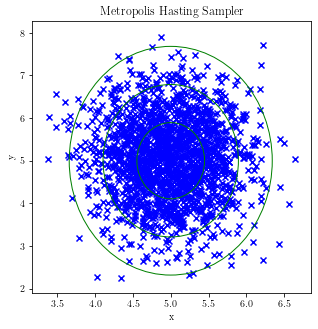

In [6]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
m =  mean
cov_ellipse(m, sigma, ax, data='truth')
for i in range(len(samples)):
    
    ax.scatter(samples[i][0], samples[i][1], color='b', marker='x')


ax.set_title(r'Metropolis Hasting Sampler')
ax.set_xlabel(r'x')
ax.set_ylabel(r'y')

plt.show()



## Test acceptance ratio

In [8]:
acc_rat = []
auto_corr = []
dimensions = []
it = 10000
warm_start = 5000

for i in range(1, 50, 5):

    dim = i
    dimensions.append(dim)
    sigma = np.zeros((dim, dim))

    for i in range(dim):
        sigma[i, i] = 1


    print(dim)

    x_0 = [0 for _ in range(dim)]
    multi_var_fix = functools.partial(multi_var, mean = [5 for _ in range(dim)], sigma=sigma)

    hm = HM()


    multi, warm = hm.sample(x_0, multi_var_fix,  it, rs, warm_start=5000)
    acc_rat.append(len(multi) / (it - warm_start))
    


Text(0, 0.5, 'Acceptation ratio ($\\alpha$)')

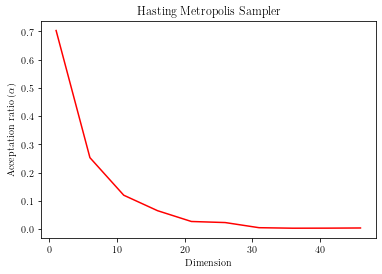

In [9]:
plt.plot(dimensions, acc_rat, color='r')
plt.title(r'Hasting Metropolis Sampler')
plt.xlabel(r'Dimension')
plt.ylabel(r'Acceptation ratio ($\alpha$)')


## Autocorrelation $(D = 20)$

In [10]:
dim = 20

sigma = np.eye(dim)
mean = [5 for _ in range(dim)]

sigma[0, 0] = 0.2
sigma[1, 1] = 0.8

multi_var_fix = functools.partial(multi_var, mean = mean, sigma=sigma)

x_0 = [0 for _ in range(dim)]

samples, warm = hm.sample(x_0, multi_var_fix, 10000, rs)


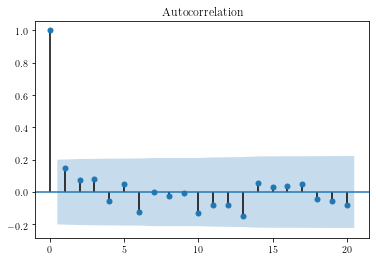

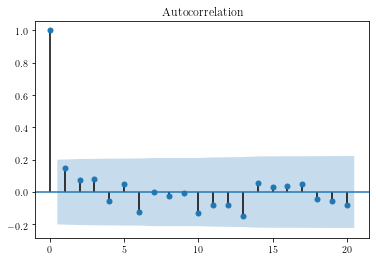

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
samp = np.array(samples)
plot_acf(samp[:, 0])